<div class="usecase-title">Soil Analysis and Prediction</div>

<div class="usecase-authors"><b>Authored by: </b> Thomas Rostov</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Advanced</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python, Pandas, MatPlotLib, Scikit-Learn</div>
</div>

<div class="usecase-section-header">Scenario</div>

As a city planner, I would like to understand how soil moisture is impacted by various weather events, to determine if specific areas are more prone to waterlogging/flooding. This information would be useful for making informed decisions such as determing where extra drainage could be beneficial. I would also like to create a model for predicting the impact of various conditions on soil moisture, to allow even greater preparation.

<div class="usecase-section-header">What this use case will teach you</div>

At the end of this use case you will:
- Clean data to ensure it is standardised and consistent
- Seperate and merge dataframes 
- Do general data wrangling to ensure the datasets are easier to work with
- Create multiple visualizations comparing different variables
- Analyse these visualizations, see how the variables impact the results
- Perform initial machine learning to see how hyperparameter and model selection impacts the results
- Seperately encode two different categorical variables into numerical ones 
- Select and further tune a final machine learning model
- Encode both categorical variables at the same time, and train a final model on the full dataset
- Input custom predictions to your model
- Visualize these results with colour coded map markers using Folium

<div class="usecase-section-header">Introduction</div>

In this use case we will analyse how soil sensor readings are impacted by different variables, such as weather conditions/soil type/soil depth. Then, we will create a machine learning model to make custom predictions for soil moisture based on environmental conditions.  
First, the datasets will be imported (ideally through downloading, they are included in the github folder). Next, extensive data cleaning and wrangling/manipulation will be performed to both standardise the data and make it easier to work with. Then, visualization will be done to compare and analyse the impact of numerous variables. Machine learning will then be performed, comparing different models and hyperparameter inputs, to find a model which works well for this data. Encoding will be done to encode two different categorical variables during this. Finally, a machine learning model which trains on the whole dataset will be created and its performance tested. Then once this is finalised, a method for allowing custom inputs to this model will be created, and the predicted soil moisture values will be shown on a Folium map, with colour coding based on the value.

### Importing Libraries and Data

Remember to use your own API key if downloading data using the API function. Otherwise, ensure the downloaded dataset filenames are correct. 

In [1]:
#Importing libraries
import requests
import statistics
import numpy as np
import pandas as pd
import ipywidgets as widgets
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
import folium

In [2]:
#Importing datasets (API)
#This is a very large dataset, so downloading is recommended
#Weather dataset is not from CoM, but is included in the github files
#comment out if using locally downloaded datasets

# def collect_data(dataset_id):
#     base_url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/"
#     apikey = 
#     dataset_id = dataset_id
#     format = 'csv'

#     url = f'{base_url}{dataset_id}/exports/{format}'
#     params = {
#         'select': '*',
#         'limit': -1,  # all records
#         'lang': 'en',
#         'timezone': 'Australia/Melbourne',
#         'api_key': apikey  # use if use datasets API_key permissions
#     }

#     response = requests.get(url, params=params)

#     if response.status_code == 200:
#         # StringIO to read the CSV data
#         url_content = response.content.decode('utf-8')
#         dataset = pd.read_csv(StringIO(url_content), delimiter=';')
#         return dataset
#     else:
#         print(f'Request failed with status code {response.status_code}')
        
# data_soil = collect_data('soil-sensor-readings-historical-data-2022')
# locations = collect_data('soil-sensor-locations')
# data_weather = pd.read_csv('Melbourne Weather Data 2022.csv')

In [3]:
#Importing Datasets (Downloaded)
#Weather dataset is not from CoM, but is included in the github files
#comment out if using API 

data_soil = pd.read_csv('soil_readings.csv')
data_weather = pd.read_csv('Melbourne Weather Data 2022.csv')
locations = pd.read_csv('soil-sensor-locations.csv')

Visualising the dataset formats

In [4]:
print(len(data_soil))
data_soil.head()

4283583


,date_time,site_name,site_id,id,date,time,probe_id,probe_measure,soil_value,unit,json_featuretype
0,2022-12-07T18:00:00+11:00,Shrine Reserve South West,64984,15178649,2022-12-07,18:00:00,1306862,Soil Temperature 60cm #0,16.21,ºC,SoilSensorData
1,2022-12-07T22:30:00+11:00,Princess bridge NW p01,101032,15178652,2022-12-07,22:30:00,2019275,Soil Moisture 40cm (Adjusted),13.81,%VWC,SoilSensorData
2,2022-12-08T02:00:00+11:00,Fitzroy Gardens West '18,65011,15178660,2022-12-08,02:00:00,1305913,Soil Salinity 60cm #0,0.34,µS/cm,SoilSensorData
3,2022-12-07T22:00:00+11:00,Bourke North 5,66201,15178677,2022-12-07,22:00:00,1310519,Soil Moisture 40cm #0,78.47,%VWC,SoilSensorData
4,2022-12-08T04:00:00+11:00,Carlton Gardens North,64979,15178683,2022-12-08,04:00:00,1306505,Soil Moisture 60cm #0,50.44,%VWC,SoilSensorData


In [5]:
data_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Melbourne,Australia",2022-01-01,36.5,20.6,26.2,34.9,20.6,25.7,11.8,43.4,...,21.3,9,NaN,2022-01-01T06:01:34,2022-01-01T20:45:17,0.94,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"95874099999,94866099999,95936099999,9586609999..."
1,"Melbourne,Australia",2022-01-02,29.4,18.8,23.0,28.3,18.8,22.9,13.1,55.4,...,22.4,9,NaN,2022-01-02T06:02:22,2022-01-02T20:45:25,0.97,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"95874099999,94866099999,95936099999,9586609999..."
2,"Melbourne,Australia",2022-01-03,19.9,16.8,18.2,19.9,16.8,18.2,10.8,62.3,...,28.1,10,NaN,2022-01-03T06:03:11,2022-01-03T20:45:30,0.00,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"95874099999,94866099999,95936099999,9586609999..."
3,"Melbourne,Australia",2022-01-04,22.4,16.3,19.4,22.4,16.3,19.4,14.5,73.6,...,10.8,5,NaN,2022-01-04T06:04:02,2022-01-04T20:45:34,0.04,Overcast,Cloudy skies throughout the day.,cloudy,"95874099999,94866099999,95936099999,9586609999..."
4,"Melbourne,Australia",2022-01-05,28.5,20.1,23.5,28.6,20.1,23.5,16.4,65.7,...,19.6,10,NaN,2022-01-05T06:04:53,2022-01-05T20:45:35,0.07,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"95874099999,D6954,94866099999,95936099999,9586..."


### Cleaning Data

Before we can begin working with these datasets, we first need to do some data cleaning and manipulation. The datetime information needs to be converted into a more usable format, and the measurements need to be standardised, as currently there are many different names for the same type of measurement. For example, some measurements specify the soil type, while others are of slightly different format etc. 

In [6]:
#removing timezone from soil dataset
data_soil['datetime'] = pd.to_datetime(data_soil['date_time'], errors='coerce') 

def remove_timezone(x):
     return x.replace(tzinfo=None)
    
data_soil['datetime_no_tz'] = data_soil['datetime'].apply(remove_timezone)

In [7]:
#creating a date column for soil dataset
data_soil['date_column'] = data_soil['datetime_no_tz'].dt.date

Below is a list of all unique probe measurements  
From this we can see the soil types are:  
Sand, Sandy Loam, Clay, Clayey Loam, and Loam  
The raw measurement is included for all sensors, however this measurement is then calibrated to the specific soil type for sensors for which this is known. 

From looking at the below list, its obvious that this dataset lacks consistency, with unstandardised formatting throughout. Even the soil types have different formats, for example some have brackets eg: (Clay), while others dont. Additionally, there are various other inconsistencies which will be addressed and filtered out later.

In [8]:
#all the unique measurement names
measure_unique = data_soil['probe_measure'].unique()
print(measure_unique)

['Soil Temperature 60cm #0' 'Soil Moisture 40cm (Adjusted)'
 'Soil Salinity 60cm #0' 'Soil Moisture 40cm #0' 'Soil Moisture 60cm #0'
 'Soil Moisture 70cm' 'Soil Moisture 10cm #0'
 'Soil Moisture 20cm (Adjusted)' 'Soil Moisture 30cm #0 (Sand)'
 'Soil Temperature 40cm' 'Soil Moisture 30cm #0'
 'Soil Moisture 10cm (Adjusted)' '#0 Soil Moisture 70cm'
 'Soil Temperature 80cm #0' 'Soil Salinity 50cm #0' 'Soil Salinity 10cm'
 'Soil Temperature 70cm #0' 'Soil Moisture 70cm #0 (Clay)'
 'Soil Salinity 50cm' 'Soil Moisture 20cm #0 (Sandy Loam)'
 'Soil Moisture 40cm #0 (Clay)' 'Soil Moisture 80cm #0 (Sand)'
 'Soil Salinity 30cm #0' 'Soil Moisture 20cm #0' 'Soil Moisture 60cm'
 'Soil Moisture Loam 50cm' 'Soil Temperature 50cm #0'
 '#0 Soil Moisture 10cm' '#0 Soil Moisture 20cm' 'Soil Moisture 70cm #0'
 '#0 Soil Moisture 50cm' 'Soil Salinity 10cm #0' 'Soil Moisture 80cm #0'
 'Soil Salinity 70cm #0' 'Soil Temperature 30cm #0'
 '#0 Soil Moisture 40cm' 'Soil Temperature 10cm #0'
 'Soil Salinity 20cm #0

In [9]:
#checking if the soil type is included in the measurement 
def check_soil_type(measure):
    if '(Sand)' in measure:
        return 'Sand'
    elif '(Sandy Loam)' in measure:
        return 'Sandy Loam'
    elif '(Clay)' in measure or 'Clay ' in measure:
        return 'Clay'
    elif '(Clayey Loam)' in measure:
        return 'Clayey Loam'
    elif 'Clay-Loam' in measure: 
        return 'Clay-Loam'
    elif '(Loam)' in measure or 'Loam ' in measure:
        return 'Loam'
    else:
        return 'Not-Stated'

In [10]:
#including the soil type in a seperate column
data_soil['soil_type'] = data_soil['probe_measure'].apply(check_soil_type)

In [11]:
#standardising measurements
cm_list = ['10cm', '20cm', '30cm', '40cm', '50cm', '60cm', '70cm', '80cm']
mes_list = ['Temperature', 'Moisture', 'Salinity']

def check_measurement(measure):
    for cm in cm_list:
        for mes in mes_list:
            if mes in measure and cm in measure:
                return 'Soil ' + mes + ' ' + cm
            
data_soil['probe_measure_inorder'] = data_soil['probe_measure'].apply(check_measurement)

In [12]:
#checking the changes
data_soil.head()

,date_time,site_name,site_id,id,date,time,probe_id,probe_measure,soil_value,unit,json_featuretype,datetime,datetime_no_tz,date_column,soil_type,probe_measure_inorder
0,2022-12-07T18:00:00+11:00,Shrine Reserve South West,64984,15178649,2022-12-07,18:00:00,1306862,Soil Temperature 60cm #0,16.21,ºC,SoilSensorData,2022-12-07 18:00:00+11:00,2022-12-07 18:00:00,2022-12-07,Not-Stated,Soil Temperature 60cm
1,2022-12-07T22:30:00+11:00,Princess bridge NW p01,101032,15178652,2022-12-07,22:30:00,2019275,Soil Moisture 40cm (Adjusted),13.81,%VWC,SoilSensorData,2022-12-07 22:30:00+11:00,2022-12-07 22:30:00,2022-12-07,Not-Stated,Soil Moisture 40cm
2,2022-12-08T02:00:00+11:00,Fitzroy Gardens West '18,65011,15178660,2022-12-08,02:00:00,1305913,Soil Salinity 60cm #0,0.34,µS/cm,SoilSensorData,2022-12-08 02:00:00+11:00,2022-12-08 02:00:00,2022-12-08,Not-Stated,Soil Salinity 60cm
3,2022-12-07T22:00:00+11:00,Bourke North 5,66201,15178677,2022-12-07,22:00:00,1310519,Soil Moisture 40cm #0,78.47,%VWC,SoilSensorData,2022-12-07 22:00:00+11:00,2022-12-07 22:00:00,2022-12-07,Not-Stated,Soil Moisture 40cm
4,2022-12-08T04:00:00+11:00,Carlton Gardens North,64979,15178683,2022-12-08,04:00:00,1306505,Soil Moisture 60cm #0,50.44,%VWC,SoilSensorData,2022-12-08 04:00:00+11:00,2022-12-08 04:00:00,2022-12-08,Not-Stated,Soil Moisture 60cm


### Seperating and Merging Data

Now that we have standardised the dataset, we will also determine what sensors have a specified soil type, and what others dont, seperating these into a dataframe containing all values, as well as one containing only sensors with a specified soil type. Furthermore, there can be multiple measurements for each day at a specific sensor, however for ease of use/consistency we will simply take the average measurement from that day for each sensor. We will also add some columns such as the current month, which will be used in later sections. 

In [13]:
#unique list of site names/sensors
sensor_list = data_soil['site_name'].unique().tolist()

In [14]:
#list of unique measurements, in order
measurement_list = ['Soil Temperature 10cm', 'Soil Temperature 20cm', 'Soil Temperature 30cm', 'Soil Temperature 40cm', 
                   'Soil Temperature 50cm', 'Soil Temperature 60cm', 'Soil Temperature 70cm', 'Soil Temperature 80cm',
                   'Soil Moisture 10cm', 'Soil Moisture 20cm', 'Soil Moisture 30cm', 'Soil Moisture 40cm', 
                   'Soil Moisture 50cm', 'Soil Moisture 60cm', 'Soil Moisture 70cm', 'Soil Moisture 80cm', 
                   'Soil Salinity 10cm', 'Soil Salinity 20cm', 'Soil Salinity 30cm', 'Soil Salinity 40cm', 
                   'Soil Salinity 50cm', 'Soil Salinity 60cm', 'Soil Salinity 70cm', 'Soil Salinity 80cm']

In [15]:
#two different DF's, one for the raw values, one which includes the soil type
data_soil_notype = data_soil.copy()
data_soil_type = data_soil.copy()

In [16]:
#removing the adjusted values to have one dataset with all standardised raw values 
for sensor in sensor_list:
    if len(data_soil_notype[data_soil_notype['site_name'] == sensor]['soil_type'].unique()) > 1:
        mask = (data_soil_notype['site_name'] == sensor) & (data_soil_notype['soil_type'] != 'Not-Stated')
        data_soil_notype.drop(index=data_soil_notype[mask].index, inplace=True)
    else:
        continue

In [17]:
#removing the unadjusted raw values from the sensors which have a determined soil type
for sensor in sensor_list:
    if len(data_soil_type[data_soil_type['site_name'] == sensor]['soil_type'].unique()) > 1:
        mask = (data_soil_type['site_name'] == sensor) & (data_soil_type['soil_type'] == 'Not-Stated')
        data_soil_type.drop(index=data_soil_type[mask].index, inplace=True)
    else:
        continue

In [18]:
#grouping by average values daily
data_soil_daily_notype = data_soil_notype.groupby(['date_column', 'site_name', 'probe_measure_inorder']).agg({'soil_value': 'mean'}).reset_index()
data_soil_daily_type = data_soil_type.groupby(['date_column', 'site_name', 'probe_measure_inorder', 'soil_type']).agg({'soil_value': 'mean'}).reset_index()

In [19]:
#the raw values dataframe
print(len(data_soil_daily_notype))
data_soil_daily_notype.head()

363522


,date_column,site_name,probe_measure_inorder,soil_value
0,2022-01-01,8th Green,Soil Moisture 10cm,50.078571
1,2022-01-01,8th Green,Soil Moisture 20cm,55.730000
2,2022-01-01,8th Green,Soil Moisture 30cm,51.622857
3,2022-01-01,8th Green,Soil Moisture 40cm,67.078571
4,2022-01-01,8th Green,Soil Salinity 10cm,0.487143


In [20]:
#converting weather to correct format
data_weather['datetime'] = pd.to_datetime(data_weather['datetime']) 
data_weather['date_column'] = data_weather['datetime'].dt.date

In [21]:
#merging DF's
data_merged = pd.merge(data_weather, data_soil_daily_notype, on=['date_column'])
data_merged_type = pd.merge(data_weather, data_soil_daily_type, on=['date_column'])

In [22]:
#adding a month column and then keeping necessary columns for the raw values dataframe
data_merged['month'] = data_merged['datetime'].dt.month
data_merged['datetime'] = pd.to_datetime(data_merged['date_column'])
data_merged['month'] = data_merged['datetime'].dt.month

columns_to_keep = ['date_column', 'site_name', 'probe_measure_inorder', 'soil_value', 'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'month']
data_merged = data_merged[columns_to_keep]

#doing the same for the second (soil type included) dataframe
data_merged_type['month'] = data_merged_type['datetime'].dt.month
data_merged_type['datetime'] = pd.to_datetime(data_merged_type['date_column'])
data_merged_type['month'] = data_merged_type['datetime'].dt.month

columns_to_keep = ['date_column', 'site_name', 'probe_measure_inorder', 'soil_value', 'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'month', 'soil_type']
data_merged_type = data_merged_type[columns_to_keep]

In [23]:
#the raw values dataframe which now includes weather information 
print(len(data_merged))
data_merged.head()

363522


,date_column,site_name,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month
0,2022-01-01,8th Green,Soil Moisture 10cm,50.078571,36.5,20.6,26.2,43.4,0.0,1
1,2022-01-01,8th Green,Soil Moisture 20cm,55.730000,36.5,20.6,26.2,43.4,0.0,1
2,2022-01-01,8th Green,Soil Moisture 30cm,51.622857,36.5,20.6,26.2,43.4,0.0,1
3,2022-01-01,8th Green,Soil Moisture 40cm,67.078571,36.5,20.6,26.2,43.4,0.0,1
4,2022-01-01,8th Green,Soil Salinity 10cm,0.487143,36.5,20.6,26.2,43.4,0.0,1


### Interactive Visualization

Now that we have workable dataframes, we can easily visualize soil sensor values. In this section I have created code which allows visualization of the averaged daily sensor values for any depth and measurement taken. Feel free to play around with this and see the results from various sensors and depths

In [24]:
#function takes the sensor and measurement index from the above list and creates a graph
def create_graph(sensor_index, measurement_index):
    filtered = data_merged[(data_merged['site_name'] == sensor_list[sensor_index]) & (data_merged['probe_measure_inorder'] == measurement_list[measurement_index])]
    plt.figure(figsize=(10, 6))  
    plt.plot(filtered['date_column'], filtered['soil_value'])
    plt.title('Measurements for: ' + sensor_list[sensor_index])  
    plt.xlabel('Date')  
    plt.ylabel(measurement_list[measurement_index])
    plt.grid(True) 
    plt.show()

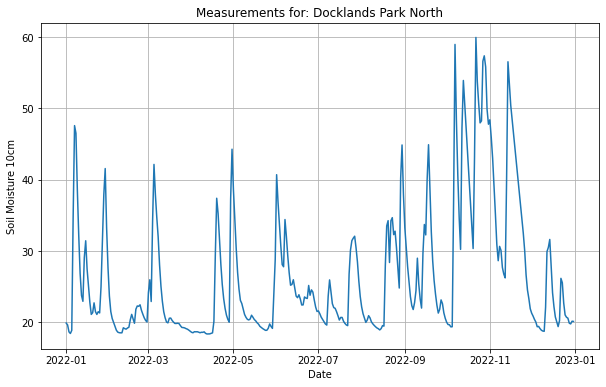

In [25]:
create_graph(6,8)

In [26]:
#widget selection options
#selecting the sensor
dropdown_sensor = widgets.Dropdown(
    options=sensor_list,
    value=sensor_list[0],
    description='Select the sensor/location:',
    layout=widgets.Layout(width='400px'),
    style={'description_width': 'initial'},
    disabled=False,
)

#selecting the specific measurement
dropdown_measurement = widgets.Dropdown(
    options=measurement_list,
    value=measurement_list[0],
    description='Select the measurement:',
    layout=widgets.Layout(width='400px'),
    style={'description_width': 'initial'},
    disabled=False,
)

In [27]:
#widget logic
def on_button_click(a):
    sensor_input = sensor_list.index(dropdown_sensor.value)
    measure_input = measurement_list.index(dropdown_measurement.value)
    create_graph(sensor_input, measure_input)

button = widgets.Button(description="Create Graph")
button.on_click(on_button_click)

display(widgets.HBox([dropdown_sensor, dropdown_measurement]))
display(button)

Button(description='Create Graph', style=ButtonStyle())

## Deeper analysis for a specific sensor

In these sections, I will compare multiple different variables against each other, to see how these variables affect sensor readings. These are just examples, so feel free to read through them and use them as guides to create your own graphs.

In [28]:
#isolating the data for a single sensor 
sen_index = sensor_list.index('Royal Parade Opposite Lawn 5')
data_single = data_merged[(data_merged['site_name'] == sensor_list[sen_index]) & (data_merged['probe_measure_inorder'] == 'Soil Moisture 10cm')]
data_single.head()

,date_column,site_name,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month
939,2022-01-01,Royal Parade Opposite Lawn 5,Soil Moisture 10cm,21.977917,36.5,20.6,26.2,43.4,0.000,1
2186,2022-01-02,Royal Parade Opposite Lawn 5,Soil Moisture 10cm,21.580833,29.4,18.8,23.0,55.4,0.000,1
3417,2022-01-03,Royal Parade Opposite Lawn 5,Soil Moisture 10cm,21.294800,19.9,16.8,18.2,62.3,0.000,1
4616,2022-01-04,Royal Parade Opposite Lawn 5,Soil Moisture 10cm,21.394583,22.4,16.3,19.4,73.6,0.000,1
5780,2022-01-05,Royal Parade Opposite Lawn 5,Soil Moisture 10cm,21.363913,28.5,20.1,23.5,65.7,0.002,1


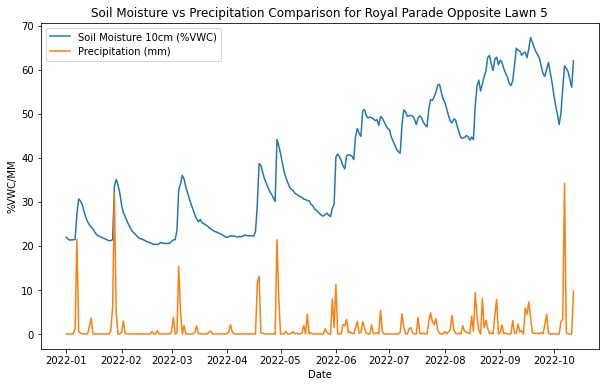

In [29]:
#overlaying precipitation with soil moisture for comparison
plt.figure(figsize=(10, 6))  
plt.plot(data_single['date_column'], data_single['soil_value'], label = 'Soil Moisture 10cm (%VWC)')
plt.plot(data_single['date_column'], data_single['precip'], label = 'Precipitation (mm)')
plt.xlabel('Date')
plt.ylabel('%VWC/MM')
plt.title('Soil Moisture vs Precipitation Comparison for Royal Parade Opposite Lawn 5')
plt.legend()
plt.show()

This graph shows a clear correlation between rainfall (show in mm) and measured soil moisture. As rainfall happens, the soil moisture immediately jumps, and then slowly decreases overtime. Furthermore, in later months as rainfall happens more regularly, the soil moisture consistently increases as it has no time to dry out to previous levels.

In [30]:
#now to analyse temperature 
data_single = data_merged[(data_merged['site_name'] == sensor_list[sen_index]) & (data_merged['probe_measure_inorder'] == 'Soil Temperature 10cm')]
data_single.head()

,date_column,site_name,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month
955,2022-01-01,Royal Parade Opposite Lawn 5,Soil Temperature 10cm,21.040000,36.5,20.6,26.2,43.4,0.000,1
2202,2022-01-02,Royal Parade Opposite Lawn 5,Soil Temperature 10cm,19.715000,29.4,18.8,23.0,55.4,0.000,1
3433,2022-01-03,Royal Parade Opposite Lawn 5,Soil Temperature 10cm,18.926923,19.9,16.8,18.2,62.3,0.000,1
4632,2022-01-04,Royal Parade Opposite Lawn 5,Soil Temperature 10cm,19.651538,22.4,16.3,19.4,73.6,0.000,1
5796,2022-01-05,Royal Parade Opposite Lawn 5,Soil Temperature 10cm,20.070000,28.5,20.1,23.5,65.7,0.002,1


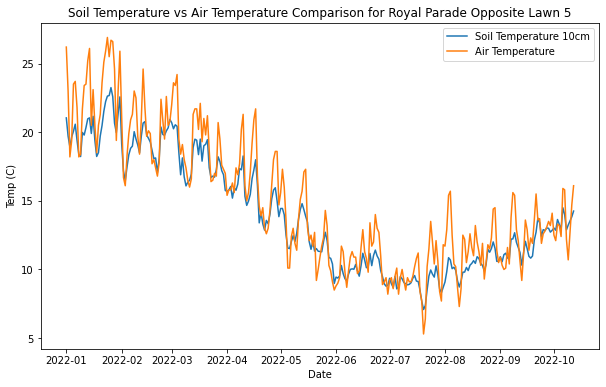

In [31]:
#air temperature vs soil temperature at 10cm
plt.figure(figsize=(10, 6))  
plt.plot(data_single['date_column'], data_single['soil_value'], label = 'Soil Temperature 10cm')
plt.plot(data_single['date_column'], data_single['temp'], label = 'Air Temperature')
plt.xlabel('Date')
plt.ylabel('Temp (C)')
plt.title('Soil Temperature vs Air Temperature Comparison for Royal Parade Opposite Lawn 5')
plt.legend()
plt.show()

Shown here is the comparison between measured soil and air temperature. As can be seen, the air temperature changes are more drastic in comparison to soil temperature changes, as it provides insulation, however the correlation between them is clearly visible. 

In [32]:
#composite graph to compare moisture readings at different depths
data_single = data_merged[data_merged['site_name'] == sensor_list[sen_index]]
data_single.head()

,date_column,site_name,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month
939,2022-01-01,Royal Parade Opposite Lawn 5,Soil Moisture 10cm,21.977917,36.5,20.6,26.2,43.4,0.0,1
940,2022-01-01,Royal Parade Opposite Lawn 5,Soil Moisture 20cm,21.813750,36.5,20.6,26.2,43.4,0.0,1
941,2022-01-01,Royal Parade Opposite Lawn 5,Soil Moisture 30cm,21.707917,36.5,20.6,26.2,43.4,0.0,1
942,2022-01-01,Royal Parade Opposite Lawn 5,Soil Moisture 40cm,17.502500,36.5,20.6,26.2,43.4,0.0,1
943,2022-01-01,Royal Parade Opposite Lawn 5,Soil Moisture 50cm,21.550833,36.5,20.6,26.2,43.4,0.0,1


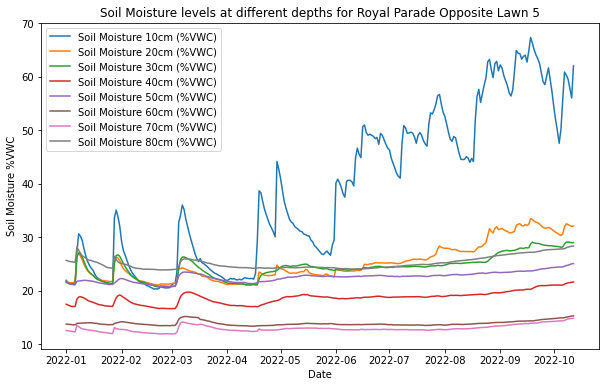

In [33]:
#plotting these differences
plt.figure(figsize=(10, 6))  

plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[8]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[8]]['soil_value'], label = 'Soil Moisture 10cm (%VWC)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[9]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[9]]['soil_value'], label = 'Soil Moisture 20cm (%VWC)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[10]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[10]]['soil_value'], label = 'Soil Moisture 30cm (%VWC)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[11]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[11]]['soil_value'], label = 'Soil Moisture 40cm (%VWC)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[12]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[12]]['soil_value'], label = 'Soil Moisture 50cm (%VWC)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[13]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[13]]['soil_value'], label = 'Soil Moisture 60cm (%VWC)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[14]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[14]]['soil_value'], label = 'Soil Moisture 70cm (%VWC)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[15]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[15]]['soil_value'], label = 'Soil Moisture 80cm (%VWC)')
plt.xlabel('Date')
plt.ylabel('Soil Moisture %VWC')
plt.title('Soil Moisture levels at different depths for Royal Parade Opposite Lawn 5')
plt.legend()

plt.show()

This graph shows how the depth affects the soil moisture, with greater depths generally retaining less moisture, and reacting less to rainfall in comparison to shallower ones.

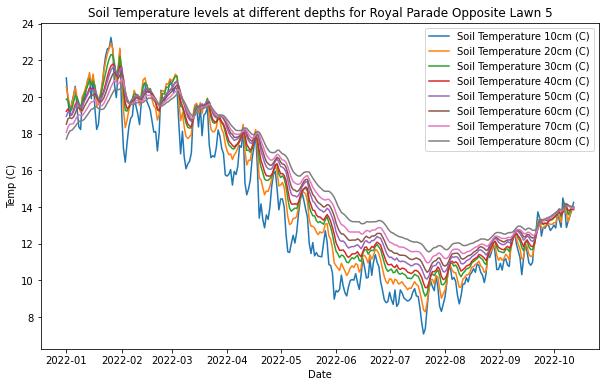

In [34]:
#composite line graph showing the differences between temperatures at different depths
plt.figure(figsize=(10, 6))  

plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[0]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[0]]['soil_value'], label = 'Soil Temperature 10cm (C)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[1]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[1]]['soil_value'], label = 'Soil Temperature 20cm (C)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[2]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[2]]['soil_value'], label = 'Soil Temperature 30cm (C)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[3]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[3]]['soil_value'], label = 'Soil Temperature 40cm (C)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[4]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[4]]['soil_value'], label = 'Soil Temperature 50cm (C)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[5]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[5]]['soil_value'], label = 'Soil Temperature 60cm (C)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[6]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[6]]['soil_value'], label = 'Soil Temperature 70cm (C)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[7]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[7]]['soil_value'], label = 'Soil Temperature 80cm (C)')
plt.xlabel('Date')
plt.ylabel('Temp (C)')
plt.title('Soil Temperature levels at different depths for Royal Parade Opposite Lawn 5')
plt.legend()

plt.show()

This graph compares the temperature changes between depths, with again the expected pattern observed, showing that deeper soil depths have greater insulation and therefore react slower to external temperature changes.

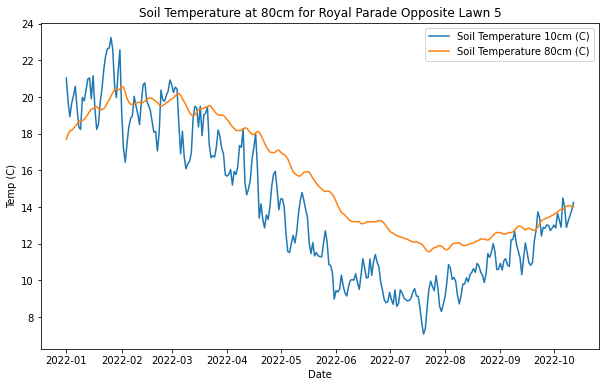

In [35]:
#10cm vs 80cm soil temperature comparison
plt.figure(figsize=(10, 6))  

plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[0]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[0]]['soil_value'], label = 'Soil Temperature 10cm (C)')
plt.plot(data_single[data_single['probe_measure_inorder'] == measurement_list[7]]['date_column'], data_single[data_single['probe_measure_inorder'] == measurement_list[7]]['soil_value'], label = 'Soil Temperature 80cm (C)')
plt.xlabel('Date')
plt.ylabel('Temp (C)')
plt.title('Soil Temperature at 80cm for Royal Parade Opposite Lawn 5')
plt.legend()

plt.show()

Instead of showing all measurement depths, this graph only shows the measurements at 10 and 80cm, allowing easier comparison of how soil depth insulates from temperature changes.

### Comparison between moisture levels for sensors in different soil types

In [36]:
#isolating soil types
soil_types = data_merged_type['soil_type'].unique().tolist()
soil_types.remove('Not-Stated')
soil_types

['Sandy Loam', 'Clay', 'Clayey Loam', 'Sand', 'Loam', 'Clay-Loam']

In [37]:
#isolating the measurement to be for soil moisture at 10cm
data_single = data_merged_type[data_merged_type['probe_measure_inorder'] == 'Soil Moisture 10cm']
data_single.head()

,date_column,site_name,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month,soil_type
0,2022-01-01,8th Green,Soil Moisture 10cm,28.125714,36.5,20.6,26.2,43.4,0.0,1,Sandy Loam
4,2022-01-01,9th Fairway,Soil Moisture 10cm,18.769167,36.5,20.6,26.2,43.4,0.0,1,Sandy Loam
8,2022-01-01,Bandstand,Soil Moisture 10cm,63.658571,36.5,20.6,26.2,43.4,0.0,1,Not-Stated
24,2022-01-01,Batman Park,Soil Moisture 10cm,30.422857,36.5,20.6,26.2,43.4,0.0,1,Not-Stated
40,2022-01-01,Bourke North 1,Soil Moisture 10cm,29.145714,36.5,20.6,26.2,43.4,0.0,1,Sand


In [38]:
#finding the soil types at 10cm
soil_types_sensor_10 = {}
for i in soil_types:
    soil_types_sensor_10[i] = data_merged_type[(data_merged_type['soil_type'] == i) & (data_merged_type['probe_measure_inorder'] == 'Soil Moisture 10cm')]['site_name'].unique().tolist()

In [39]:
#as an example, this shows every sensor with readings for Clayey Loam at 10cm
soil_types_sensor_10['Clayey Loam']

['Carlton Gardens North',
 'Carlton Gardens South 1',
 "Fitzroy Gardens South '18",
 'Flagstaff Gardens 3',
 'Lincoln Square North',
 'Point Park',
 'Princes Park Lawn 5',
 'Treasury Gardens North',
 'Treasury Gardens South',
 "Fitzroy Gardens West '18",
 'Flagstaff Gardens 2']

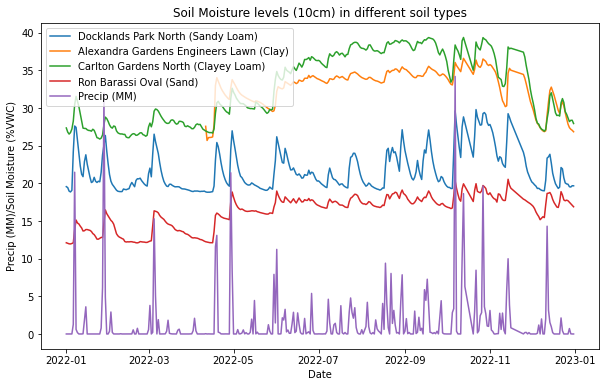

In [40]:
#plotting four different examples against each other 
sen_index_1 = sensor_list.index(soil_types_sensor_10['Sandy Loam'][2])
data_sen_1 = data_single[(data_single['site_name'] == sensor_list[sen_index_1]) & (data_single['soil_type'] == 'Sandy Loam')]

sen_index_2 = sensor_list.index(soil_types_sensor_10['Clay'][0])
data_sen_2 = data_single[(data_single['site_name'] == sensor_list[sen_index_2]) & (data_single['soil_type'] == 'Clay')]

sen_index_3 = sensor_list.index(soil_types_sensor_10['Clayey Loam'][0])
data_sen_3 = data_single[(data_single['site_name'] == sensor_list[sen_index_3]) & (data_single['soil_type'] == 'Clayey Loam')]

sen_index_4 = sensor_list.index(soil_types_sensor_10['Sand'][14])
data_sen_4 = data_single[(data_single['site_name'] == sensor_list[sen_index_4]) & (data_single['soil_type'] == 'Sand')]

plt.figure(figsize=(10, 6))  
plt.plot(data_sen_1['date_column'], data_sen_1['soil_value'], label = sensor_list[sen_index_1] + " (Sandy Loam)")
plt.plot(data_sen_2['date_column'], data_sen_2['soil_value'], label = sensor_list[sen_index_2] + " (Clay)")
plt.plot(data_sen_3['date_column'], data_sen_3['soil_value'], label = sensor_list[sen_index_3] + " (Clayey Loam)")
plt.plot(data_sen_4['date_column'], data_sen_4['soil_value'], label = sensor_list[sen_index_4] + " (Sand)")

plt.plot(data_single['date_column'], data_single['precip'], label = 'Precip (MM)')
plt.xlabel('Date')
plt.ylabel('Precip (MM)/Soil Moisture (%VWC)')
plt.title('Soil Moisture levels (10cm) in different soil types')
plt.legend()

plt.show()

As can be observed from this graph, the type of soil greatly influences its moisture retaining characteristics. For example, sandy loam in this case has sharp increases in moisture readings with rainfall in comparison to others, however both sand and sandy loam retain less moisture in the long term compared to clay and clayey loam. 

### Comparison of Temperature Variability for Different Sensors 

In [41]:
#the sensors with specific soil types didnt measure temperature, so sadly soil type cant be used to compare thjis
data_single = data_merged_type[data_merged_type['probe_measure_inorder'] == 'Soil Temperature 10cm']
temp_site_list = data_single['site_name'].unique().tolist()
data_single.head()

,date_column,site_name,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month,soil_type
16,2022-01-01,Bandstand,Soil Temperature 10cm,22.238571,36.5,20.6,26.2,43.4,0.0,1,Not-Stated
32,2022-01-01,Batman Park,Soil Temperature 10cm,21.207143,36.5,20.6,26.2,43.4,0.0,1,Not-Stated
168,2022-01-01,Cnr Barry & Leicester,Soil Temperature 10cm,31.115714,36.5,20.6,26.2,43.4,0.0,1,Not-Stated
184,2022-01-01,Conservatory,Soil Temperature 10cm,22.420000,36.5,20.6,26.2,43.4,0.0,1,Not-Stated
200,2022-01-01,Darling Square,Soil Temperature 10cm,21.780000,36.5,20.6,26.2,43.4,0.0,1,Not-Stated


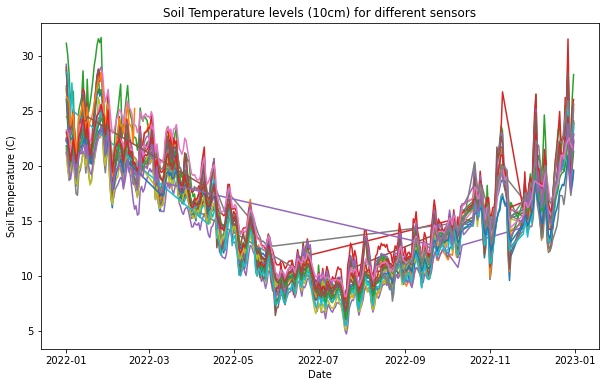

In [42]:
#this graph shows the sensor readings at 10cm
plt.figure(figsize = (10,6))
for i in temp_site_list:
    y = data_single[data_single['site_name'] == i]['soil_value']
    x = data_single[data_single['site_name'] == i]['date_column']
    plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Soil Temperature (C)')
plt.title('Soil Temperature levels (10cm) for different sensors')
plt.show()

From this graph, a general pattern can be observed throughout the measurement period, with temperature decreasing towards the middle of winter, and then increasing again towards the end of the year as expected. This graph simply shows the variability of the various sensor measurements.

In [43]:
#getting measurements at 80cm
data_single = data_merged_type[data_merged_type['probe_measure_inorder'] == 'Soil Temperature 80cm']
data_single.head()

,date_column,site_name,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month,soil_type
23,2022-01-01,Bandstand,Soil Temperature 80cm,18.392857,36.5,20.6,26.2,43.4,0.0,1,Not-Stated
39,2022-01-01,Batman Park,Soil Temperature 80cm,19.051429,36.5,20.6,26.2,43.4,0.0,1,Not-Stated
175,2022-01-01,Cnr Barry & Leicester,Soil Temperature 80cm,24.544286,36.5,20.6,26.2,43.4,0.0,1,Not-Stated
191,2022-01-01,Conservatory,Soil Temperature 80cm,18.160000,36.5,20.6,26.2,43.4,0.0,1,Not-Stated
207,2022-01-01,Darling Square,Soil Temperature 80cm,18.345714,36.5,20.6,26.2,43.4,0.0,1,Not-Stated


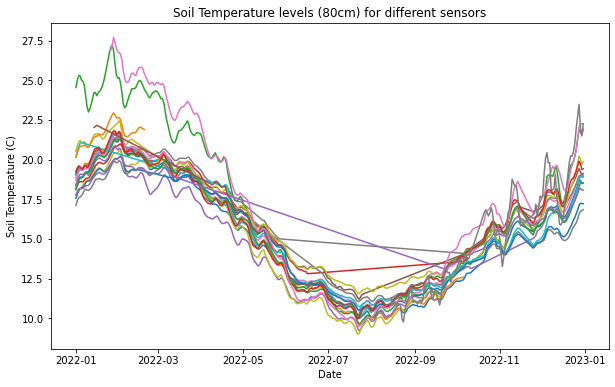

In [44]:
#this graph shows the sensor readings at 80cm
plt.figure(figsize = (10,6))
for i in temp_site_list:
    y = data_single[data_single['site_name'] == i]['soil_value']
    x = data_single[data_single['site_name'] == i]['date_column']
    plt.plot(x,y)
plt.xlabel('Date')
plt.ylabel('Soil Temperature (C)')
plt.title('Soil Temperature levels (80cm) for different sensors')
plt.show()

Similar graph to above, however only showing the readings at 80cm instead of 10cm. This again shows that insulation has a great effect on both the range and rate of change for the measured temperatures.

### Initial ML

Initial ML will be done on a specific probe measurement in order to gauge scores based on hyperparameter inputs and speed up training times. I have created a function that will allow automatic testing of a range of hyperparameter training inputs, which can be specified by the user. The results from these inputs will then be tested using various metrics, which will then be graphed for comparison.

In [45]:
data_merged.head()

,date_column,site_name,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month
0,2022-01-01,8th Green,Soil Moisture 10cm,50.078571,36.5,20.6,26.2,43.4,0.0,1
1,2022-01-01,8th Green,Soil Moisture 20cm,55.730000,36.5,20.6,26.2,43.4,0.0,1
2,2022-01-01,8th Green,Soil Moisture 30cm,51.622857,36.5,20.6,26.2,43.4,0.0,1
3,2022-01-01,8th Green,Soil Moisture 40cm,67.078571,36.5,20.6,26.2,43.4,0.0,1
4,2022-01-01,8th Green,Soil Salinity 10cm,0.487143,36.5,20.6,26.2,43.4,0.0,1


In [46]:
#creating a dataframe for a specific probe measurement to use for ML 
measure = 'Soil Moisture 30cm'
data_ml = data_merged[data_merged['probe_measure_inorder'] == measure].copy()
data_ml = data_ml.drop(columns=['date_column', 'probe_measure_inorder'])
data_ml.head()

,site_name,soil_value,tempmax,tempmin,temp,humidity,precip,month
2,8th Green,51.622857,36.5,20.6,26.2,43.4,0.0,1
13,9th Fairway,15.674167,36.5,20.6,26.2,43.4,0.0,1
24,Bandstand,47.325714,36.5,20.6,26.2,43.4,0.0,1
40,Batman Park,38.342857,36.5,20.6,26.2,43.4,0.0,1
56,Bourke North 1,66.627143,36.5,20.6,26.2,43.4,0.0,1


In [47]:
#splitting into features and testing
features = data_ml.drop("soil_value", axis=1)
target = data_ml["soil_value"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [48]:
#encoding the site names using an ordinal encoder
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

def encoding(encoder):
    #encoding for both training and testing 
    X_train_enc['site_name'] = encoder.fit_transform(X_train[['site_name']])
    X_test_enc['site_name'] = encoder.transform(X_test[['site_name']])
    
    decoded_values = encoder.inverse_transform(X_train_enc['site_name'].to_numpy().reshape(-1, 1))
    encoded_values = X_train_enc['site_name'].to_numpy().reshape(-1, 1)
    
    return decoded_values, encoded_values

Below is a function that tests model hyperparams based on the inputs  
The first input is the model name (eg: RandomForestRegressor)  
The second input is the variable being tested (eg: n_estimators)  
The final three variables account for the starting value of this variable, the step size and the number of iterations  
For example, start at 200, increase by 50 every run, for a total of 5 runs

In [49]:
#model hyperparameter testing function
def auto_testing(model_name, variable_name_i, variable_start_i, step_size_i, iternum):
    variable_track = variable_start_i
    score_list = [[],[],[],[]]
    var_track = []
    for i in range(iternum):
        #creates and trains the specified model
        params = {variable_name_i: variable_track}
        model_comp = model_name(**params)
        model_comp.fit(X_train_enc, y_train)
        
        #gets the predictions from this model, as well as its resulting performance
        predictions = model_comp.predict(X_test_enc)
        mse = mean_squared_error(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)
        rmse = mean_squared_error(y_test, predictions, squared=False)
        
        #adds these results to the score list
        score_list[0].append(mse)
        score_list[1].append(mae)
        score_list[2].append(r2)
        score_list[3].append(rmse)
        var_track.append(variable_track)
        
        variable_track += step_size_i
        
    return score_list, var_track

In [50]:
#scales the scores for easy comparison
def score_scaler(scores):
    data_ar = np.array(scores)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_ar.T).T

    #flipping r2 to allow direct comparison 
    for i in range(len(scaled_data[2])):
        x = scaled_data[2][i]
        if x <= 0.5: 
            x = ((0.5 - x) * 2) + x
        else: 
            x = x - ((x - 0.5) * 2)
        scaled_data[2][i] = x
    return scaled_data

In [51]:
#graphs the scaled performance scores of the tested inputs
#the lower mse/mae/inverted r2/rmse are the better

def scale_graph(list_i, scores):
    #gets the rounded actual (unscaled) scores for reference
    max_mse, min_mse = round(max(scores[0]), 3), round(min(scores[0]), 3)
    max_mae, min_mae = round(max(scores[1]), 3), round(min(scores[1]), 3)
    max_r2, min_r2 = round(max(scores[2]), 3), round(min(scores[2]), 3)
    max_rmse, min_rmse = round(max(scores[3]), 3), round(min(scores[3]), 3)

    #plots the scaled scores, with the actual scores included in the legend
    plt.figure(figsize=(16,5))
    plt.plot(var_list, list_i[0], label = f'mse, max: {max_mse}, min: {min_mse}')
    plt.plot(var_list, list_i[1], label = f'mae, max: {max_mae}, min: {min_mae}')
    plt.plot(var_list, list_i[2], label = f'inverted r2, max: {max_r2}, min: {min_r2}')
    plt.plot(var_list, list_i[3], label = f'rmse, max: {max_rmse}, min: {min_rmse}')
    plt.title('Score results based on input')
    plt.xlabel('Variable')
    plt.ylabel('Scaled Score')
    plt.legend()
    plt.show

In [52]:
#encodes the site name using an ordinal encoder
encoder = OrdinalEncoder()
decoded_values, encoded_values = encoding(encoder)

In this section, I have given examples of two different ML models, Random Forest Regressor and Gradient Boosting Regessor. The hyperparameter being tested is n_estimators. The inputs provided are simply reference inputs, to show how the scores of the models change based on the input hyperparameters. Feel free to play around with these and input your own custom values, until you find both a model and inputs that provide satisfactory results.

In [53]:
scores, var_list = auto_testing(RandomForestRegressor,'n_estimators',200,50,12)

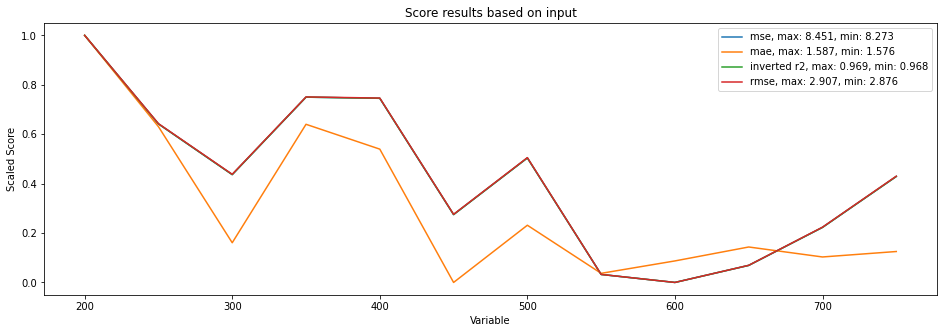

In [54]:
scaled_scores = score_scaler(scores)
scale_graph(scaled_scores, scores)

In [55]:
scores, var_list = auto_testing(GradientBoostingRegressor,'n_estimators',200,100,12)

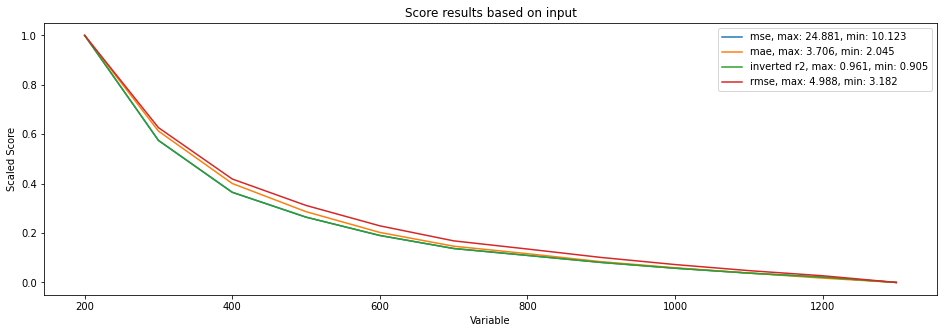

In [56]:
scaled_scores = score_scaler(scores)
scale_graph(scaled_scores, scores)

### Experimental: Encoding Based On Sensor Reading/Depth

In the previous section, encoding was done based on the site name. In this section the encoding is done based on the sensor depth instead. This will lead to different results as the ML model trains based on a single sites multiple sensor readings, while in the other section it trains on a single reading over multiple sites.

In [57]:
#gets all the soil moisture readings from the sensors at a single site 
measure = 'Bandstand'
moisture_measures = measurement_list[8:16]
data_ml = data_merged[(data_merged['site_name'] == measure) & (data_merged['probe_measure_inorder'].isin(moisture_measures))].copy()
data_ml = data_ml.drop(columns=['date_column', 'site_name'])
data_ml.head()

,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month
22,Soil Moisture 10cm,63.658571,36.5,20.6,26.2,43.4,0.0,1
23,Soil Moisture 20cm,58.752857,36.5,20.6,26.2,43.4,0.0,1
24,Soil Moisture 30cm,47.325714,36.5,20.6,26.2,43.4,0.0,1
25,Soil Moisture 40cm,46.931429,36.5,20.6,26.2,43.4,0.0,1
26,Soil Moisture 50cm,49.137143,36.5,20.6,26.2,43.4,0.0,1


In [58]:
#splits this into training and testing sets
features = data_ml.drop("soil_value", axis=1)
target = data_ml["soil_value"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [59]:
#encoding the sensor depths using an ordinal encoder
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

def encoding(encoder):
    #encoding for both training and testing 
    X_train_enc['probe_measure_inorder'] = encoder.fit_transform(X_train[['probe_measure_inorder']])
    X_test_enc['probe_measure_inorder'] = encoder.transform(X_test[['probe_measure_inorder']])
    
    decoded_values = encoder.inverse_transform(X_train_enc['probe_measure_inorder'].to_numpy().reshape(-1, 1))
    encoded_values = X_train_enc['probe_measure_inorder'].to_numpy().reshape(-1, 1)
    
    return decoded_values, encoded_values

In [60]:
#encodes the sensor depths using an ordinal encoder
encoder = OrdinalEncoder()
decoded_values, encoded_values = encoding(encoder)

In [61]:
scores, var_list = auto_testing(GradientBoostingRegressor,'n_estimators',200,100,12)

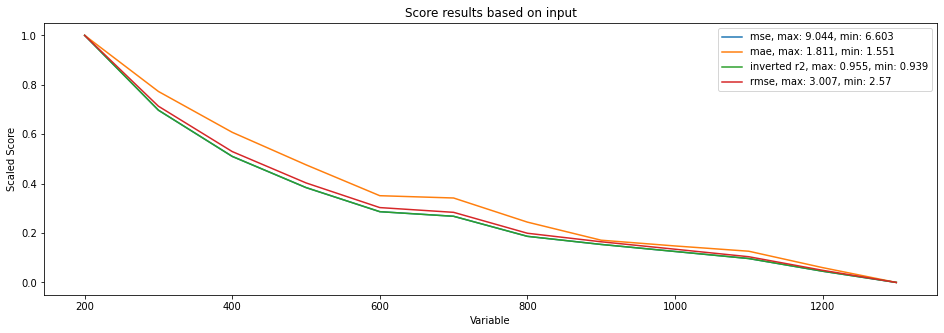

In [62]:
scaled_scores = score_scaler(scores)
scale_graph(scaled_scores, scores)

### Final Model Selection and Evaluation/Tuning

After selecting a model/s and the desired hyperparameter inputs, this section can be used to further finetune the model, and visualize the predictions taking place, using the below graphing function.

In [63]:
#function that outputs model performance as well as creates a graph comparing predicted vs actual values.
#provides an overview of the model performance 

def performance_overview(model):
    #gets the predictions and scores
    predictions = model.predict(X_test_enc)
    mae = mean_absolute_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    #prints the scores
    print("Performance: ")
    print("Mean Absolute Error: " + str(mae))
    print("Root Mean Squared Error: " + str(rmse))
    print("R2 Score: " + str(r2))
    
    #creates a graph comparing the predicted values vs the actual values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)

    min_val = min(min(y_test), min(predictions))
    max_val = max(max(y_test), max(predictions))
    
    #creates a 'perfect prediction line', values closer to this line mean better predictions.
    plt.plot([min_val, max_val], [min_val, max_val], '--', color='red')

    plt.title('Actual vs Predicted Values')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)
    plt.show()

The below input hyperparameteres do not necessarily create the best results, they are just there for ease of use/reference, creating a model that generally performs well.

In [64]:
model_comp = RandomForestRegressor(n_estimators = 300)
model_comp.fit(X_train_enc, y_train)

RandomForestRegressor(n_estimators=300)

Performance: 
Mean Absolute Error: 1.6090225165660763
Root Mean Squared Error: 3.160284895097017
R2 Score: 0.932421287324463


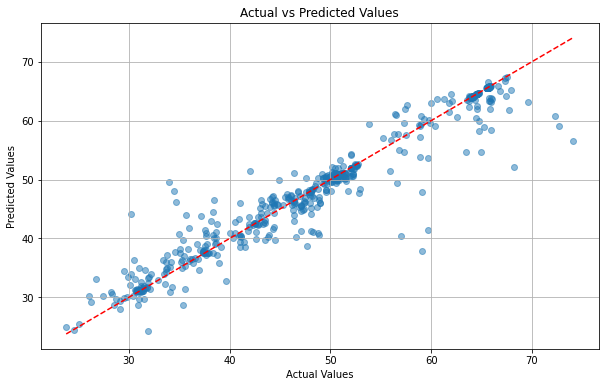

In [65]:
performance_overview(model_comp)

In [66]:
model_comp = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=5, random_state=0)
model_comp.fit(X_train_enc, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=500, random_state=0)

Performance: 
Mean Absolute Error: 1.2547936343198376
Root Mean Squared Error: 2.3477515307563643
R2 Score: 0.9627040470333421


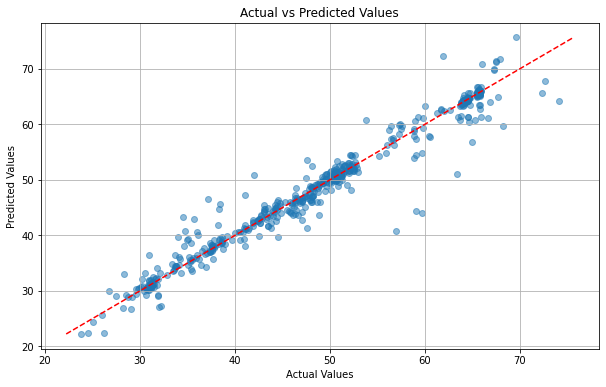

In [67]:
performance_overview(model_comp)

## Double Encoded Model For Custom Predictions

After selecting and finalizing the model that will be used, we can now encode the final results based on both site name and depth, which will train on the whole available dataframe. Note that this training process can take a long time, especially if a complex model is being used, so ensure your inputs are finalised as well as they can be.

In [68]:
#taking the moisture measurements from the whole dataframe
moisture_measures = measurement_list[8:16]
data_ml = data_merged[data_merged['probe_measure_inorder'].isin(moisture_measures)].copy()
data_ml = data_ml.drop(columns=['date_column'])
data_ml.head()

,site_name,probe_measure_inorder,soil_value,tempmax,tempmin,temp,humidity,precip,month
0,8th Green,Soil Moisture 10cm,50.078571,36.5,20.6,26.2,43.4,0.0,1
1,8th Green,Soil Moisture 20cm,55.730000,36.5,20.6,26.2,43.4,0.0,1
2,8th Green,Soil Moisture 30cm,51.622857,36.5,20.6,26.2,43.4,0.0,1
3,8th Green,Soil Moisture 40cm,67.078571,36.5,20.6,26.2,43.4,0.0,1
11,9th Fairway,Soil Moisture 10cm,18.267500,36.5,20.6,26.2,43.4,0.0,1


In [69]:
#splitting into features and target 
features = data_ml.drop("soil_value", axis=1)
target = data_ml["soil_value"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In this section, both the site/sensor location is encoded, as well as the sensor measurement depth, as both of these are categorical variables, which cant be directly used in a numerical regression model. 

In [70]:
#encoding both the site name and sensor depth 
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

def encoding(encoder):
    #encoding based on site name
    X_train_enc['site_name'] = encoder.fit_transform(X_train[['site_name']])
    X_test_enc['site_name'] = encoder.transform(X_test[['site_name']])
    decoded_values_site = encoder.inverse_transform(X_train_enc['site_name'].to_numpy().reshape(-1, 1))
    encoded_values_site = X_train_enc['site_name'].to_numpy().reshape(-1, 1)
    
    #encoding based on sensor depth
    X_train_enc['probe_measure_inorder'] = encoder.fit_transform(X_train[['probe_measure_inorder']])
    X_test_enc['probe_measure_inorder'] = encoder.transform(X_test[['probe_measure_inorder']])
    decoded_values_probe = encoder.inverse_transform(X_train_enc['probe_measure_inorder'].to_numpy().reshape(-1, 1))
    encoded_values_probe = X_train_enc['probe_measure_inorder'].to_numpy().reshape(-1, 1)
    
    return decoded_values_site, encoded_values_site, decoded_values_probe, encoded_values_probe

In [71]:
#encoding using the above
encoder = OrdinalEncoder()
decoded_values_site, encoded_values_site, decoded_values_probe, encoded_values_probe = encoding(encoder)

Here we test the final model with the below sample input hyperparameters 

In [72]:
model_comp = GradientBoostingRegressor(n_estimators=1500, learning_rate=0.1, max_depth=5, random_state=0)
model_comp.fit(X_train_enc, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=1500, random_state=0)

The lower the mean absolute error/root mean squared error is, and the higher the R2 score is to 1, the better the performance of the model. The best model will also have the closest fit to the red line.

Performance: 
Mean Absolute Error: 2.0138214910965035
Root Mean Squared Error: 2.95804372424818
R2 Score: 0.9694346102719259


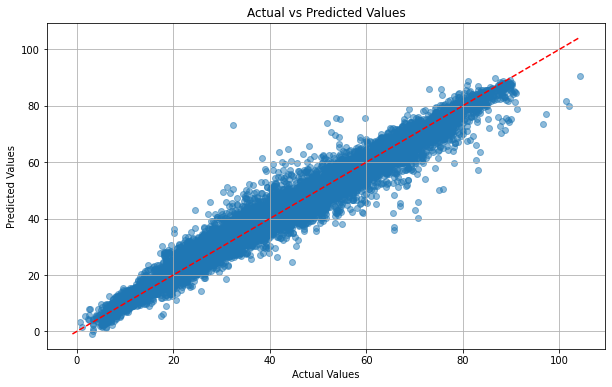

In [73]:
performance_overview(model_comp)

### Visualization of predictions

Now that the final model has been trained, we can input custom values to it, in order to get predictions. In this section, a method is created to easily input values to the model, which will then output predictions for each sensor, at each depth. These predictions can then be plotted onto a folium map, to get an interactive visualization of the models predictions for the custom inputs.

In [74]:
#encoding/decoding of site names
decoded_flat_site = decoded_values_site.flatten()
encoded_flat_site = encoded_values_site.flatten() 

coded_dict_site = dict(zip(decoded_flat_site, encoded_flat_site))

decoded_site = np.array(list(coded_dict_site.keys()))
encoded_site = np.array(list(coded_dict_site.values()))

#encoding/decoding of sensor depths
decoded_flat_probe = decoded_values_probe.flatten()
encoded_flat_probe = encoded_values_probe.flatten() 

coded_dict_probe = dict(zip(decoded_flat_probe, encoded_flat_probe))

decoded_probe = np.array(list(coded_dict_probe.keys()))
encoded_probe = np.array(list(coded_dict_probe.values()))

In [75]:
#custom input selection
#selecting temperature max
dropdown_tempmax_model = widgets.Dropdown(
    options= list(range(1, 41)), 
    value=25,
    description='Temperature Max:',
    disabled=False,
)

#selecting temperature min
dropdown_tempmin_model = widgets.Dropdown(
    options= list(range(1, 41)), 
    value=15,
    description='Temperature Min:',
    disabled=False,
)

#selecting average temperature
dropdown_temp_model = widgets.Dropdown(
    options= list(range(1, 41)), 
    value=20,
    description='Temperature:',
    disabled=False,
)

#selecting humidity
dropdown_hum_model = widgets.Dropdown(
    options= list(range(1, 101)), 
    value=50,
    description='Humidity:',
    disabled=False,
)

#selecting precipitation 
dropdown_precip_model = widgets.Dropdown(
    options= list(range(0, 50)), 
    value=0,
    description='Precip amount (mm):',
    disabled=False,
)

#selecting the month
dropdown_month_model = widgets.Dropdown(
    options= list(range(1, 13)), 
    value=1,
    description='Month:',
    disabled=False,
)

display(dropdown_tempmax_model)
display(dropdown_tempmin_model)
display(dropdown_temp_model)
display(dropdown_hum_model)
display(dropdown_precip_model)
display(dropdown_month_model)

Dropdown(description='Temperature Max:', index=24, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

Dropdown(description='Temperature Min:', index=14, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…

Dropdown(description='Temperature:', index=19, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…

Dropdown(description='Humidity:', index=49, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…

Dropdown(description='Precip amount (mm):', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…

Dropdown(description='Month:', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), value=1)

In [76]:
#encodes the inputs so that they can be fed to the model
encoded_repeat_site = np.repeat(encoded_site, len(encoded_probe))
encoded_repeat_probe = np.tile(encoded_probe, len(encoded_site))
encoded_combined = np.column_stack((encoded_repeat_site, encoded_repeat_probe))

#creates the input dataframe that will be fed to the model
df_input = pd.DataFrame(encoded_combined, columns=['site_name', 'probe_measure_inorder'])

#takes the previously selected inputs to feed into the model
df_input['tempmax'] = dropdown_tempmax_model.value
df_input['tempmin'] = dropdown_tempmin_model.value
df_input['temp'] = dropdown_temp_model.value
df_input['humidity'] = dropdown_hum_model.value
df_input['precip'] = dropdown_precip_model.value
df_input['month'] = dropdown_month_model.value

df_input.head()

,site_name,probe_measure_inorder,tempmax,tempmin,temp,humidity,precip,month
0,31.0,6.0,25,15,20,50,0,1
1,31.0,3.0,25,15,20,50,0,1
2,31.0,2.0,25,15,20,50,0,1
3,31.0,7.0,25,15,20,50,0,1
4,31.0,1.0,25,15,20,50,0,1


In [77]:
#use the model to create the predictions based on these inputs
prediction = model_comp.predict(df_input)

In [78]:
#decode both the site name and depth values
decoded_repeat_site = np.repeat(decoded_site, len(decoded_probe))
decoded_repeat_probe = np.tile(decoded_probe, len(decoded_site))
decoded_combined = np.column_stack((decoded_repeat_site, decoded_repeat_probe))

df_output = pd.DataFrame(decoded_combined, columns=['site_name', 'probe_measure_inorder'])

In [79]:
#model predictions
df_output['predicted_soil_value'] = prediction
df_output.head()

,site_name,probe_measure_inorder,predicted_soil_value
0,Fitzroy Gardens West '18,Soil Moisture 70cm,42.458230
1,Fitzroy Gardens West '18,Soil Moisture 40cm,21.131434
2,Fitzroy Gardens West '18,Soil Moisture 30cm,20.599261
3,Fitzroy Gardens West '18,Soil Moisture 80cm,50.426545
4,Fitzroy Gardens West '18,Soil Moisture 20cm,24.961898


In [80]:
#rearange the results, so that each row has the results for a specific site name
df_pivoted = df_output.pivot(index='site_name', columns='probe_measure_inorder', values='predicted_soil_value')
df_pivoted.columns.name = None  
df_pivoted.reset_index(inplace=True)

In [81]:
#get the locations from the soil sensor locations dataset
locations.drop(columns=['Site_ID', 'Property_Name', 'Location'], inplace=True)
locations = locations.rename(columns={'Site_Name': 'site_name'})
locations.head()

,site_name,Latitude,Longitude
0,Western Oval,-37.778289,144.952802
1,Carlton Gardens North,-37.801700,144.971380
2,Ron Barassi Oval,-37.816452,144.934794
3,H.G.Smith Oval,-37.786890,144.955957
4,Treasury Gardens North,-37.813350,144.976450


In [82]:
#merge these locations with the models predictions
df_predictions_merged = pd.merge(df_pivoted, locations, on='site_name')

In [83]:
#dataframe that will be used for the folium map
df_predictions_merged.head()

,site_name,Soil Moisture 10cm,Soil Moisture 20cm,Soil Moisture 30cm,Soil Moisture 40cm,Soil Moisture 50cm,Soil Moisture 60cm,Soil Moisture 70cm,Soil Moisture 80cm,Latitude,Longitude
0,5th Fairway,36.048024,32.459208,33.234164,32.523788,34.979692,35.519041,33.045962,32.869683,-37.77921,144.95251
1,8th Green,48.465859,56.646590,55.606284,70.542191,70.031271,70.558009,67.880504,67.791997,-37.78050,144.95078
2,9th Fairway,29.538193,26.468679,26.066488,35.904334,39.538048,41.390499,43.226416,43.548696,-37.78292,144.95566
3,Alexandra Gardens Engineers Lawn,28.655293,26.916656,23.586387,22.205590,28.084943,32.721116,31.935019,37.390874,-37.82073,144.97254
4,Alexandra Gardens Star Lawn,44.176923,39.861257,39.433003,39.517301,44.319034,44.404209,44.957408,35.959477,-37.82062,144.97129


In [84]:
#creates a function for determing custom colors based on a range from 0-100, larger values have more red, 
#smaller values have more green
def colour_selector(inp):
    scale = 2.55 #255/100
    mult = scale * inp
    rgb = f'rgb({mult},{255 - mult},0)'
    return rgb

In [85]:
#create a folium map to show these predictions
m = folium.Map(location = [-37.80841815, 144.95906316], zoom_start=14)

#iterates through each row, creating a marker for each sensor site 
for index, row in df_predictions_merged.iterrows():
    loc_list = [row[9], row[10]]
    
    #iterates through each sensor's depth measurement prediction
    popup_text = ''
    all_measures = []
    for i in range(8):
        #color codes the measurements
        clr = colour_selector(float(row[i+1]))
        popup_text += f"<b>{moisture_measures[i]}:</b> <span style='color: {clr};'>{str(row[i+1])}</span><br>"
        all_measures.append(float(row[i+1]))

    popup_html = f"<div>{popup_text}</div>"
    
    #the map marker inputs, including the color
    final_color = colour_selector(statistics.mean(all_measures))
    
    folium.CircleMarker(
        location=loc_list,
        radius=10, 
        popup=folium.Popup(popup_html, max_width=300),  # Apply custom popup HTML
        color='black',  
        fill=True,
        fill_color=final_color,
        fill_opacity=0.7
    ).add_to(m)

m